In [1]:
import warnings
warnings.filterwarnings("ignore")

from pymatgen.ext.matproj import MPRester
from pyxtal import pyxtal

mpr = MPRester('fn8WQGgT9rvZAh6H') # insert your keys here


In [2]:
#define your search criteria
criteria ={
           "spacegroup.number": 230,
           "nsites": {"$lt": 100},
          }

#choose the properties which you are interested:
properties = [
              "material_id",
              "structure",
              "spacegroup.number",
              #"cif",
             ]
entries = mpr.query(criteria=criteria, properties=properties)
print("Total:", len(entries))


Total: 325


Li24O96Ge24Ni16
 11.8513,  11.8513,  11.8513,  90.0000,  90.0000,  90.0000, cubic


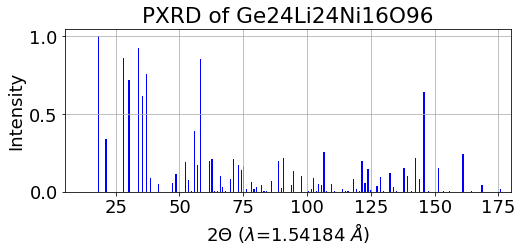

O96Sc16Cd24Ge24
 12.6476,  12.6476,  12.6476,  90.0000,  90.0000,  90.0000, cubic


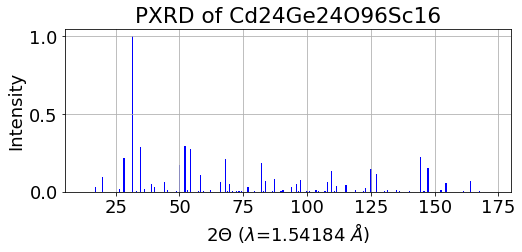

Mo16O96Mg24Ge24
 12.3617,  12.3617,  12.3617,  90.0000,  90.0000,  90.0000, cubic


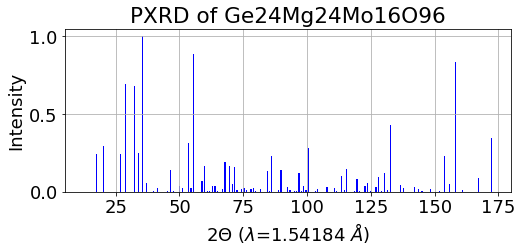

Sc16O96Y24Ga24
 12.6132,  12.6132,  12.6132,  90.0000,  90.0000,  90.0000, cubic


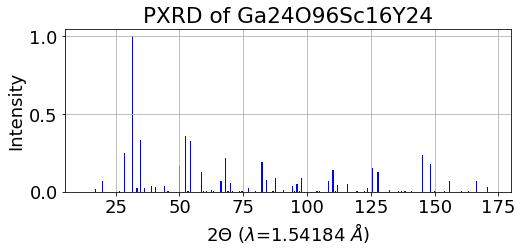

O96Mg24Ag16Si24
 12.0310,  12.0310,  12.0310,  90.0000,  90.0000,  90.0000, cubic


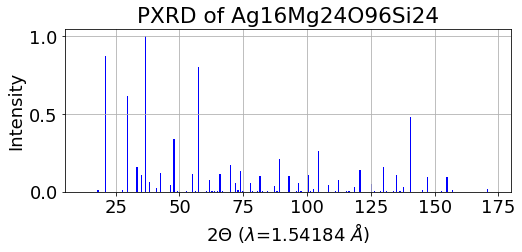

In [3]:
# Plot the PXRD for a few selected structures
for entry in entries[:5]:
    pmg = entry['structure']
    id = entry['material_id']
    s1 = pyxtal()
    s1.from_seed(pmg, tol=1e-3)
    print(s1.formula)
    print(s1.lattice)

    xrd = s1.get_XRD(thetas=[0, 180])
    xrd.plot_pxrd(fontsize=18, figsize=(8,3), show_hkl=False, xlim=[5,180], width=0.5, minimum_I=0.01)
    #two theta angles and intensity can be accessed via the following 
    #xrd.theta2
    #xrd.xrd_intensity
    

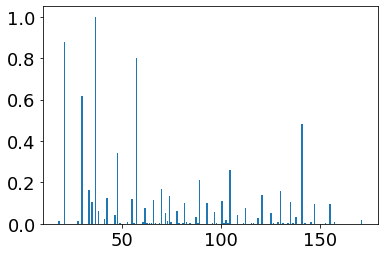

In [4]:
# A quick way to extract data and make the pxrd plot
import matplotlib.pyplot as plt
plt.bar(xrd.theta2, xrd.xrd_intensity/max(xrd.xrd_intensity))
plt.show()

mp-3731 mp-552588
  5.2230,   5.2230,  14.1292,  90.0000,  90.0000, 120.0000, hexagonal


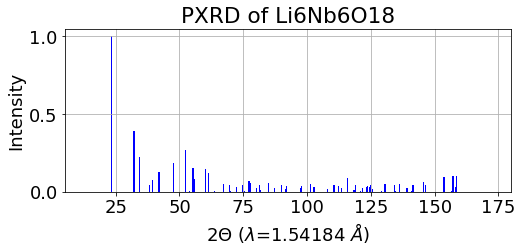

  5.2694,   5.2694,  13.9031,  90.0000,  90.0000, 120.0000, hexagonal


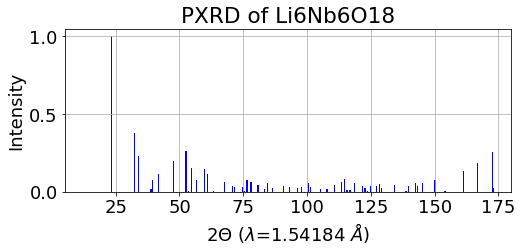

mp-7375 mp-935811
  5.7739,   5.7739,   7.1092,  90.0000,  90.0000, 120.0000, hexagonal


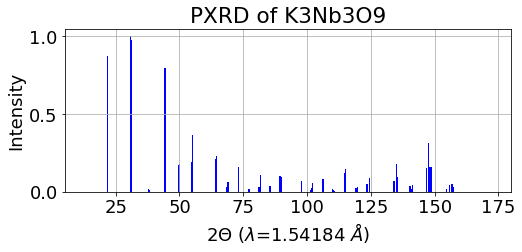

  4.0575,   4.0575,   4.0575,  90.0000,  90.0000,  90.0000, cubic


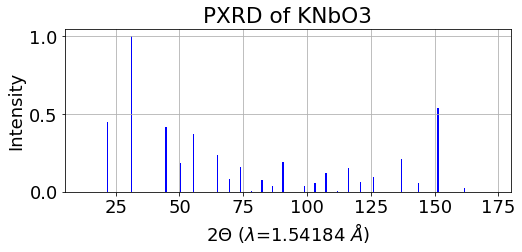

mp-5020 mp-2998
  5.7547,   5.7547,   7.1100,  90.0000,  90.0000, 120.0000, hexagonal


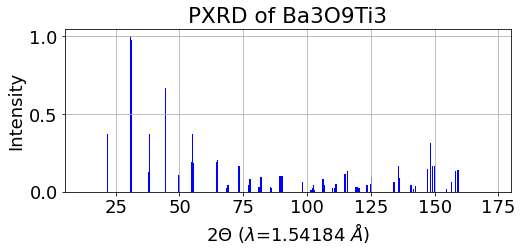

  4.0356,   4.0356,   4.0356,  90.0000,  90.0000,  90.0000, cubic


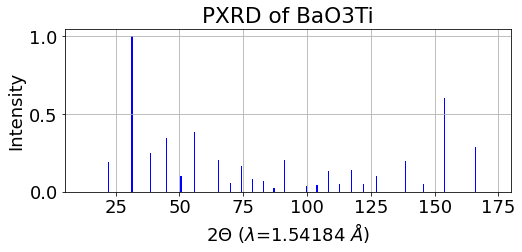

In [5]:
# Plot the PXRD for a few selected structure pairs with symmetry relation

pairs = [
         ('mp-3731', 'mp-552588'), #LiNbO3
         ('mp-7375', 'mp-935811'), #KNbO3
         ('mp-5020', 'mp-2998'),   #BaTiO3
        ]
for pair in pairs:
    (id1, id2) = pair
    print(id1, id2)
    pmg1 = mpr.get_structure_by_material_id(id1, conventional_unit_cell=True)
    pmg2 = mpr.get_structure_by_material_id(id2, conventional_unit_cell=True)
    s1 = pyxtal()
    s1.from_seed(pmg1)
    s2 = pyxtal()
    s2.from_seed(pmg2)
    print(s1.lattice)
    xrd1 = s1.get_XRD(thetas=[0, 180])
    xrd1.plot_pxrd(fontsize=18, figsize=(8,3), show_hkl=False, xlim=[5,180], width=0.5, minimum_I=0.01)
    print(s2.lattice)
    xrd2 = s2.get_XRD(thetas=[0, 180])
    xrd2.plot_pxrd(fontsize=18, figsize=(8,3), show_hkl=False, xlim=[5,180], width=0.5, minimum_I=0.01)